In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import warnings

import sys
ROOT = "../../"
sys.path.append(ROOT) # Add root directory to path

from src.preprocessing.PSF_Preprocessing import get_PSF_frames, get_PSF_frames_movie_list, show_PSFs, load_tif_movies
from src.utils.PSFDataset import PSFDataset

In [2]:
AF647_movies = load_tif_movies(ROOT + 'src/data/raw/single_fov_standard_psf/single_dye/AF647_coverslip/movies')
CF660c_movies = load_tif_movies(ROOT + 'src/data/raw/single_fov_standard_psf/single_dye/CF660c_coverslip/movies')
print(len(AF647_movies), len(CF660c_movies))
# Take every 5th frame to reduce overlapping PSFs
AF647_movies = [movie[::5] for movie in AF647_movies]
CF660c_movies = [movie[::5] for movie in CF660c_movies]

8 13


In [3]:
# Define Localization Parameters
frame_size = 19
AF647_params = {"minmass": 1500, "separation": 15, "diameter": 9, "frame_size": frame_size, "percentile": 99.5}
CF660c_params = {"minmass": 1500, "separation": 15, "diameter": 9, "frame_size": frame_size, "percentile": 99.5}

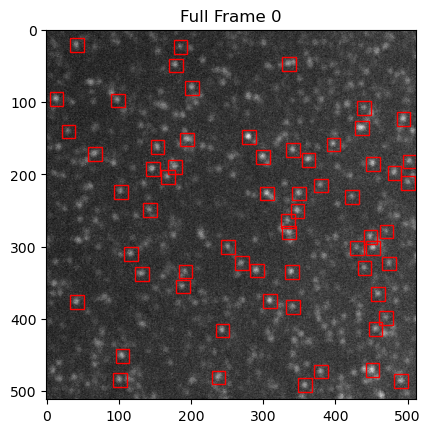

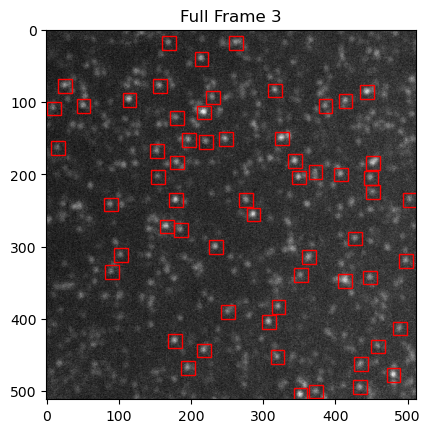

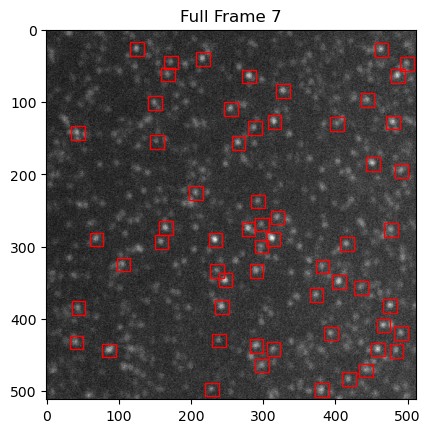

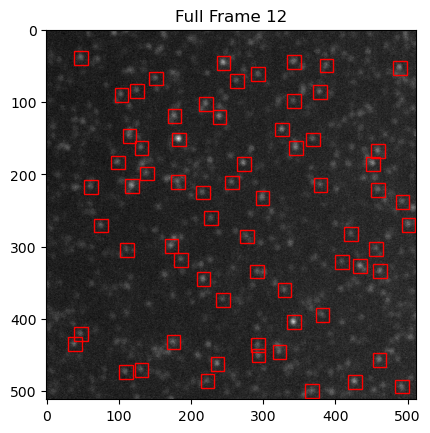

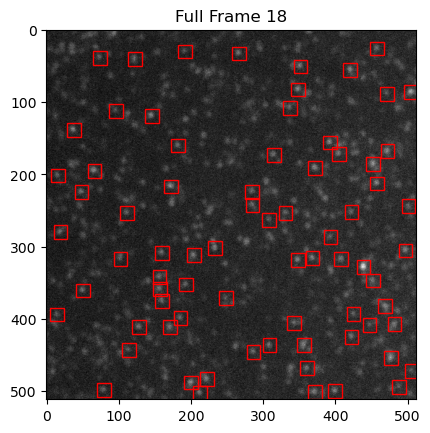

Processing Movie 1/6


100%|██████████| 20/20 [00:00<00:00, 21.00it/s]


Processing Movie 2/6


100%|██████████| 20/20 [00:00<00:00, 20.28it/s]


Processing Movie 3/6


100%|██████████| 200/200 [00:09<00:00, 21.03it/s]


Processing Movie 4/6


100%|██████████| 200/200 [00:08<00:00, 23.14it/s]


Processing Movie 5/6


100%|██████████| 200/200 [00:08<00:00, 22.44it/s]


Processing Movie 6/6


100%|██████████| 20/20 [00:00<00:00, 22.04it/s]


Processing Movie 1/2


100%|██████████| 20/20 [00:00<00:00, 21.49it/s]


Processing Movie 2/2


100%|██████████| 20/20 [00:00<00:00, 25.00it/s]


In [4]:
show_frames = [0, 3, 7, 12, 18]
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    if len(show_frames) != 0:
        AF647_PSFs_training = get_PSF_frames(AF647_movies[0], **AF647_params, print_progress=False, to_plot=True, movie_frames=show_frames)
    AF647_PSFs_training = get_PSF_frames_movie_list(AF647_movies[0:6], **AF647_params, print_progress=True)
    AF647_PSFs_testing = get_PSF_frames_movie_list(AF647_movies[6:], **AF647_params, print_progress=True)

In [5]:
print(len(AF647_PSFs_training), len(AF647_PSFs_testing))

40075 1348


(40075, 19, 19)


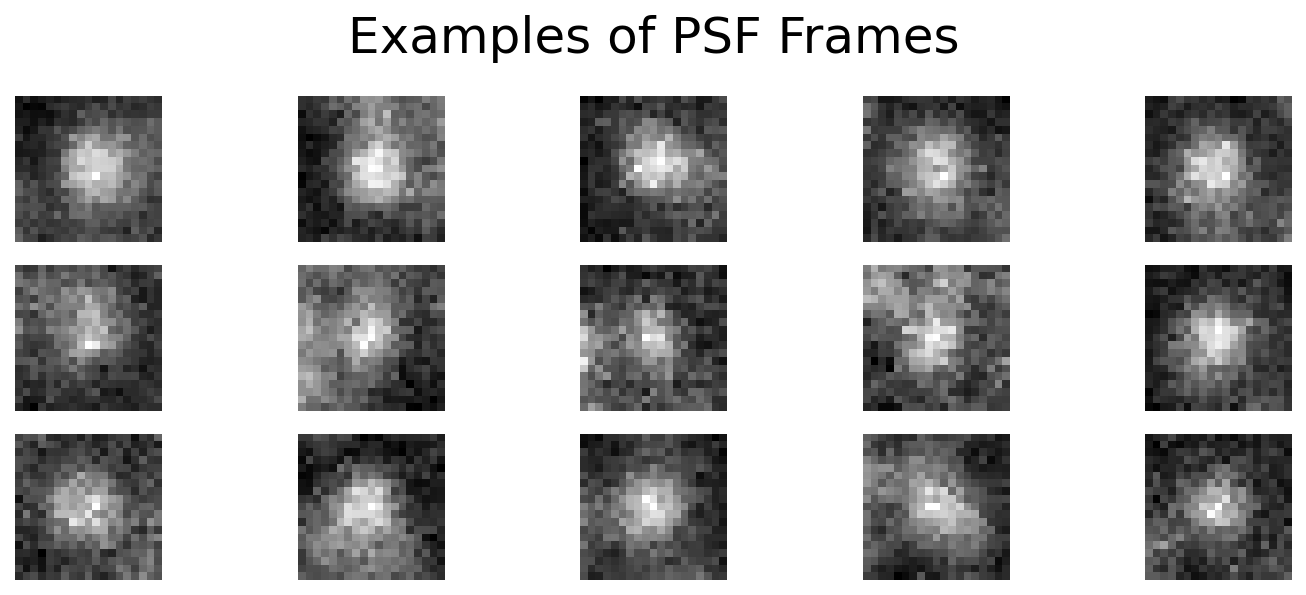

In [6]:
show_PSFs(AF647_PSFs_training)

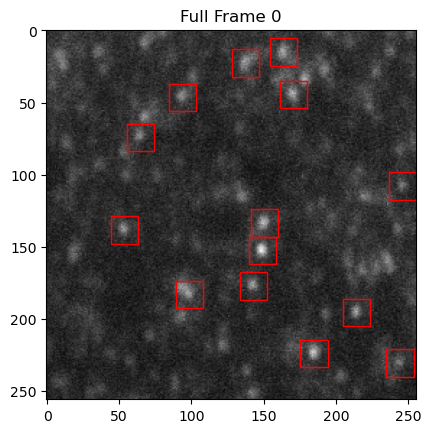

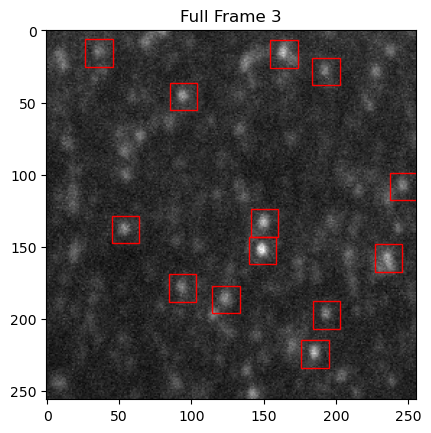

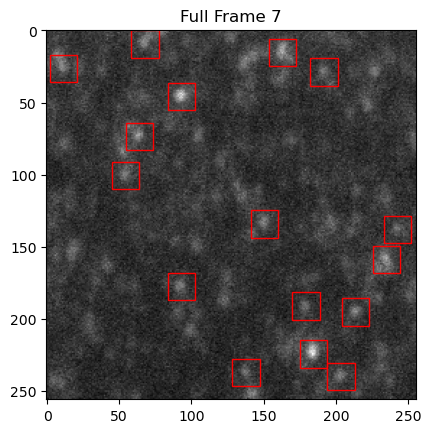

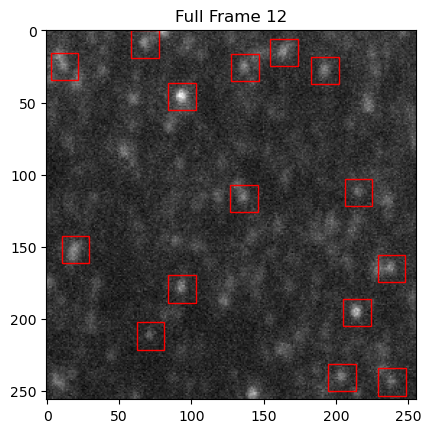

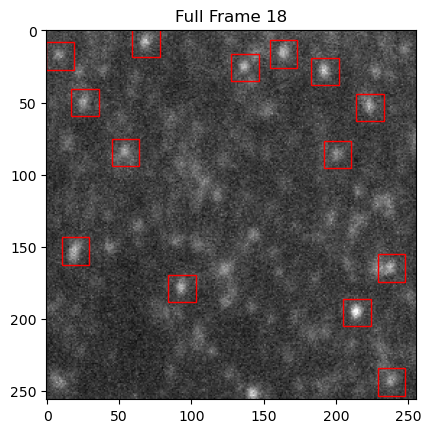

Processing Movie 1/11


100%|██████████| 200/200 [00:02<00:00, 96.55it/s] 


Processing Movie 2/11


100%|██████████| 200/200 [00:02<00:00, 94.46it/s]


Processing Movie 3/11


100%|██████████| 200/200 [00:02<00:00, 99.92it/s] 


Processing Movie 4/11


100%|██████████| 200/200 [00:02<00:00, 98.25it/s] 


Processing Movie 5/11


100%|██████████| 200/200 [00:01<00:00, 100.92it/s]


Processing Movie 6/11


100%|██████████| 200/200 [00:01<00:00, 102.73it/s]


Processing Movie 7/11


100%|██████████| 200/200 [00:01<00:00, 105.71it/s]


Processing Movie 8/11


100%|██████████| 200/200 [00:02<00:00, 91.86it/s]


Processing Movie 9/11


100%|██████████| 200/200 [00:01<00:00, 100.52it/s]


Processing Movie 10/11


100%|██████████| 100/100 [00:04<00:00, 22.40it/s]


Processing Movie 11/11


100%|██████████| 200/200 [00:02<00:00, 82.73it/s]


Processing Movie 1/2


100%|██████████| 200/200 [00:01<00:00, 100.17it/s]


Processing Movie 2/2


100%|██████████| 200/200 [00:01<00:00, 107.47it/s]


In [7]:
show_frames = [0, 3, 7, 12, 18]
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    if len(show_frames) != 0:
        CF660c_PSFs_training = get_PSF_frames(CF660c_movies[0], **CF660c_params, print_progress=False, to_plot=True, movie_frames=show_frames)
    CF660c_PSFs_training = get_PSF_frames_movie_list(CF660c_movies[0:11], **CF660c_params, print_progress=True)
    CF660c_PSFs_testing = get_PSF_frames_movie_list(CF660c_movies[11:], **CF660c_params, print_progress=True)

In [8]:
print(len(CF660c_PSFs_training), len(CF660c_PSFs_testing))

32640 5575


(32640, 19, 19)


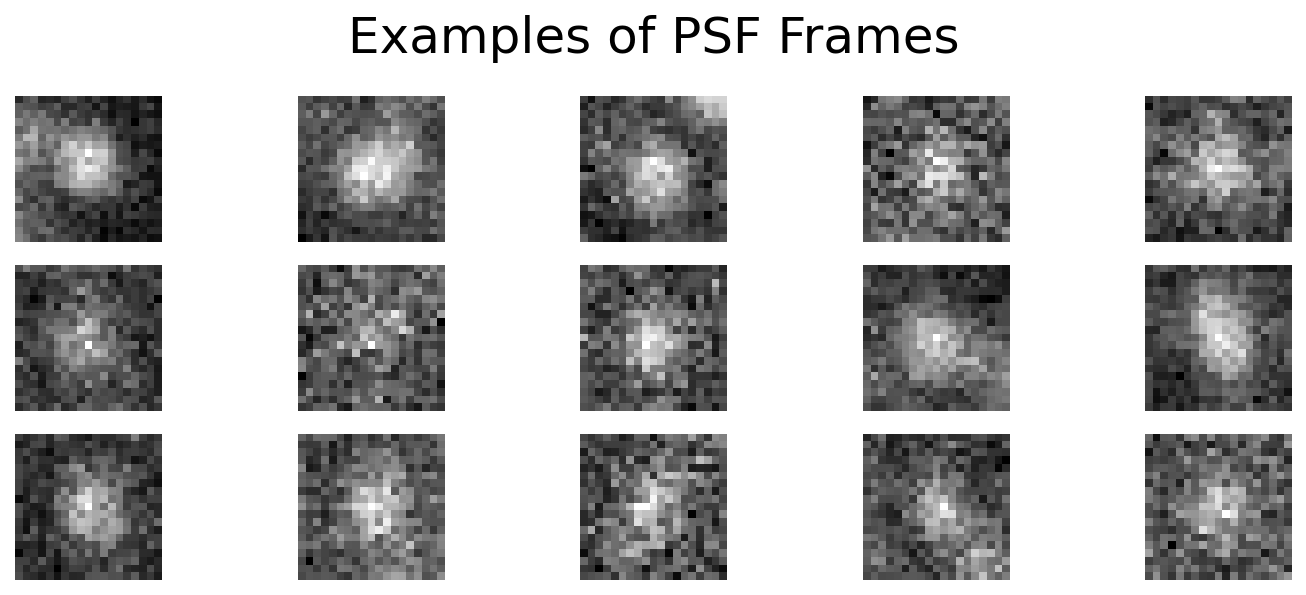

In [9]:
show_PSFs(CF660c_PSFs_training)

In [10]:
# Create datasets
raw_training = PSFDataset.create_from_PSFs([AF647_PSFs_training, CF660c_PSFs_training], 
                                                class_names=["A647", "CF660c"], normalize=False)
raw_testing = PSFDataset.create_from_PSFs([AF647_PSFs_testing, CF660c_PSFs_testing], split=0.99,
                                                class_names=["A647", "CF660c"], normalize=False)
raw_training.save('../../src/data/datasets/single_fov_standard_psf/single_dye/coverslip/AF647_CF660c_training_unnormalized.pt')
raw_testing.save('../../src/data/datasets/single_fov_standard_psf/single_dye/coverslip/AF647_CF660c_testing_unnormalized.pt')


norm_training = PSFDataset.create_from_PSFs([AF647_PSFs_training, CF660c_PSFs_training],
                                                class_names=["A647", "CF660c"], normalize=True)
norm_testing = PSFDataset.create_from_PSFs([AF647_PSFs_testing, CF660c_PSFs_testing], split=0.99, 
                                                class_names=["A647", "CF660c"], normalize=True)
norm_training.save('../../src/data/datasets/single_fov_standard_psf/single_dye/coverslip/AF647_CF660c_training_normalized.pt')
norm_testing.save('../../src/data/datasets/single_fov_standard_psf/single_dye/coverslip/AF647_CF660c_testing_normalized.pt')